Data understanding and cleaning

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from coresets import *
from sklearn.preprocessing import StandardScaler



#reading data

df=pd.read_csv("product.csv")
df.head()



,ProductID,ProductTitle,VendorID,ClusterID,ClusterLabel,CategoryID,CategoryLabel
0,1,amd ryzen 5 1600 box epexergastis me wraith sp...,1030,1,AMD Ryzen 5 1600 Box,696,CPUs
1,2,amd ryzen 5 1600,3964,1,AMD Ryzen 5 1600 Box,696,CPUs
2,3,amd ryzen 5 1600 box pliromi ke se eos 36 dosis,4814,1,AMD Ryzen 5 1600 Box,696,CPUs
3,4,amd ryzen 5 1600 yd1600bbaebox,4835,1,AMD Ryzen 5 1600 Box,696,CPUs
4,5,amd ryzen 5 1600 box yd1600bbaebox,2976,1,AMD Ryzen 5 1600 Box,696,CPUs


In [2]:
# shape of data

df.shape

(238170, 7)

In [3]:


# dropping Production Title and Cluster label (because of they do not hold value id clustering)
df=df.drop(["ProductTitle", "ClusterLabel"],axis=1)

# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238170 entries, 0 to 238169
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ProductID      238170 non-null  int64 
 1   VendorID       238170 non-null  int64 
 2   ClusterID      238170 non-null  int64 
 3   CategoryID     238170 non-null  int64 
 4   CategoryLabel  238170 non-null  object
dtypes: int64(4), object(1)
memory usage: 9.1+ MB


In [4]:
# checking null values
df.isnull().sum()

# # dropping null values
# df=df.dropna()
# df.shape


ProductID        0
VendorID         0
ClusterID        0
CategoryID       0
CategoryLabel    0
dtype: int64

In [5]:
#checking for ouliers
df.describe()

,ProductID,VendorID,ClusterID,CategoryID
count,238170.000000,238170.000000,238170.000000,238170.000000
mean,211995.806999,2135.138309,64573.760906,600.120175
std,122574.585431,1297.857629,32328.279896,510.708429
min,1.000000,7.000000,1.000000,354.000000
25%,93312.250000,945.000000,47820.000000,354.000000
50%,225734.500000,2164.000000,69515.500000,355.000000
75%,315016.750000,2848.000000,88808.000000,355.000000
max,482296.000000,5346.000000,124631.000000,2143.000000


In [6]:
# checking unique values

for i in df.columns:
    print(f'Unique Values of {i.title()}: {df[i].unique()}')


Unique Values of Productid: [     1      2      3 ... 482291 482293 482296]
Unique Values of Vendorid: [1030 3964 4814 4835 2976 3427 1996 1712 3054  282 4691 1840  251  336
   54 4455 3032    7 4223 4951 2946  101 1509 4657  299 3331  891 3021
  670 4412    9  966 2164 2723  246  956   18 4769 2863 2105 2660 1761
 5082 2004 1116  514 4635 4089  538 2786 3003 3615 3050 4957 4925 2458
 1550 3352 1521 4383 2914  708 2349 4796  322 3637  569 5215 1614 1830
  394 2907 2684 3686 4002  923 4567 3798 1837  755 5207 2662  416 4511
 2032 2870 4744 4599 4575 3121 1294 2749 2986 3252 1388 1515 3749 2461
  628 4306 3240 1021 1404  655 1084  887 3970 2063 2036 2165 1306 4870
 1308 1636 1123  649 1618 2470 2189 1968  356 3229  303 2780 2695 3405
 1489 2052 1286 1612 2564 3954 1951 1173  379 2652  452 2511 2049 1287
 3077 3348 2602 3118 1277 2441 3586 1095 1894 3194 3230  349 4848 2475
 2542  606 2059 2788 1307  532 3421 2376 2398 4928 3098 1966 2300  973
 3623 1351  508 2451 2055 5076 2919 3673 1982

In [7]:


le = LabelEncoder()

#changing object to float type

x=df
# encoder 


x['CategoryLabel'] = le.fit_transform(x['CategoryLabel'])


x=x.astype(float)
x.head(10)
# for i in x.columns:
#   print(f'Unique Values of {i.title()}: {x[i].unique()}')


,ProductID,VendorID,ClusterID,CategoryID,CategoryLabel
0,1.0,1030.0,1.0,696.0,1.0
1,2.0,3964.0,1.0,696.0,1.0
2,3.0,4814.0,1.0,696.0,1.0
3,4.0,4835.0,1.0,696.0,1.0
4,5.0,2976.0,1.0,696.0,1.0
5,6.0,3427.0,1.0,696.0,1.0
6,7.0,1996.0,1.0,696.0,1.0
7,8.0,1712.0,1.0,696.0,1.0
8,9.0,3054.0,1.0,696.0,1.0
9,10.0,282.0,1.0,696.0,1.0


In [8]:
# scaling the data usinf min max scaler
y=x
cols = y.columns
ms = StandardScaler()

y = ms.fit_transform(y)
y = pd.DataFrame(y, columns=[cols])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238170 entries, 0 to 238169
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   (ProductID,)      238170 non-null  float64
 1   (VendorID,)       238170 non-null  float64
 2   (ClusterID,)      238170 non-null  float64
 3   (CategoryID,)     238170 non-null  float64
 4   (CategoryLabel,)  238170 non-null  float64
dtypes: float64(5)
memory usage: 9.1 MB


In [9]:
# applying kmeans on full data

cost_full={}

cost=[]
time_=[]

for i in range(25):
  t0= time.time()
  kmeans = KMeans(n_clusters=100, init='k-means++', max_iter=5,n_init=1).fit(y)
  t1=time.time()-t0
  cost.append(kmeans.inertia_)
  time_.append(t1)

cost_full[100]= [sum(cost)/len(cost), sum(time_)/len(time_)]

# for k=500
cost=[]
time_=[]
for i in range(25):
   t0= time.time()
   kmeans = KMeans(n_clusters=200, init='k-means++', max_iter=5,n_init=1).fit(y)
   t1=time.time()-t0
   cost.append(kmeans.inertia_)
   time_.append(t1)

cost_full[200]= [sum(cost)/len(cost), sum(time_)/len(time_)]


print(cost_full)

 


{100: [8618.073381408798, 0.938899507522583], 200: [3220.346210732698, 2.0630380725860595]}


In [10]:
# applying k-means on lightweight coreset

from sklearn.cluster import KMeans

centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_lightweight={}

for center in centers:
    for lenth in subset_le:
        cost=[]
        time_=[]
        
        for i in range(25):
            t0= time.time()
            y_coreset, y_weights=lightweight(y,lenth)
            kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5,n_init=1).fit(y_coreset, sample_weight=y_weights)
            t1=time.time()-t0
            cost.append(kmeans.inertia_)
            time_.append(t1)
        
        cost_lightweight[(center,lenth)]= [sum(cost)/len(cost), sum(time_)/len(time_)]

print(cost_lightweight)




{(100, 1000): [6938.22111097453, 0.032934980392456056], (100, 2000): [8051.723745740508, 0.04075536727905273], (100, 3000): [8391.171968134591, 0.04841935157775879], (100, 4000): [8580.063542982489, 0.04764468193054199], (100, 5000): [8758.196892076905, 0.05287947654724121], (200, 1000): [2031.502469097708, 0.05578824996948242], (200, 2000): [2632.0682322877324, 0.07228450775146485], (200, 3000): [2848.613135623642, 0.08049983024597168], (200, 4000): [3005.692698123546, 0.09548099517822266], (200, 5000): [3071.4259734044363, 0.10035856246948242]}


In [11]:
# applying kmeans on uniform coreset
centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_uniform={}

for center in centers:
    for lenth in subset_le:
        cost=[]
        time_=[]
        for i in range(25):
            t0= time.time()
            y_coreset, y_weights=uniform(y,lenth)
            kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5, n_init=1).fit(y_coreset, sample_weight=y_weights)
            t1=time.time()-t0  
            cost.append(kmeans.inertia_)
            time_.append(t1)
        cost_uniform[(center,lenth)]= [sum(cost)/len(cost), sum(time_)/len(time_)]


print(cost_uniform)


{(100, 1000): [6352.785554254063, 0.029295682907104492], (100, 2000): [7546.169522273101, 0.03614971160888672], (100, 3000): [7885.094678195744, 0.043176708221435545], (100, 4000): [7988.713944049752, 0.05154719352722168], (100, 5000): [8174.706613764234, 0.05253619194030762], (200, 1000): [1843.4810268160318, 0.061646127700805665], (200, 2000): [2424.513031672886, 0.0812168312072754], (200, 3000): [2688.739258627601, 0.07414590835571289], (200, 4000): [2801.9380031053615, 0.08974427223205567], (200, 5000): [2891.540971345848, 0.09986542701721192]}


In [12]:
x_axis=[1000,2000,3000,4000,5000]
y_axis_100_light=[]
y_axis_200_light=[]
y_axis_100_uni=[]
y_axis_200_uni=[]

for key,value in cost_lightweight.items():
    if key[0]==100:
        y_axis_100_light.append(value[0])
    else:
        y_axis_200_light.append(value[0])

for key,value in cost_uniform.items():
    if key[0]==100:
        y_axis_100_uni.append(value[0])
    else:
        y_axis_200_uni.append(value[0])

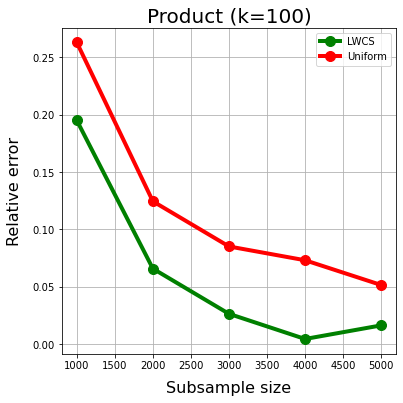

In [13]:
# plotting of relative error for k=100


# finding relative error
for i in range(len(x_axis)):
    y_axis_100_light[i]=abs(y_axis_100_light[i]-cost_full[100][0])/cost_full[100][0]
    y_axis_100_uni[i]=abs(y_axis_100_uni[i]-cost_full[100][0])/cost_full[100][0]


plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_100_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_100_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('Relative error', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Product (k=100)', size=20)

plt.legend(loc='upper right',prop={'size':10})


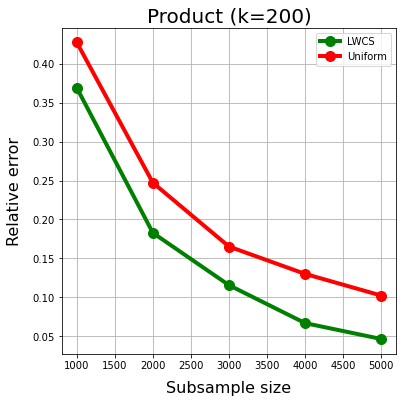

In [14]:
# plotting of relative error for k=250


# finding relative error
for i in range(len(x_axis)):
    y_axis_200_light[i]=abs(y_axis_200_light[i]-cost_full[200][0])/cost_full[200][0]
    y_axis_200_uni[i]=abs(y_axis_200_uni[i]-cost_full[200][0])/cost_full[200][0]




plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_200_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_200_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('Relative error', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Product (k=200)', size=20)

plt.legend(loc='upper right',prop={'size':10})


In [15]:
# plotting speedup for k=100

x_axis=[1000,2000,3000,4000,5000]
y_axis_100_light=[]
y_axis_200_light=[]
y_axis_100_uni=[]
y_axis_200_uni=[]

# finding speedup

for key,value in cost_lightweight.items():
    if key[0]==100:
        y_axis_100_light.append(cost_full[100][1]/value[1])
    else:
        y_axis_200_light.append(cost_full[200][1]/value[1])

for key,value in cost_uniform.items():
    if key[0]==100:
        y_axis_100_uni.append(cost_full[100][1]/value[1])
    else:
        y_axis_200_uni.append(cost_full[200][1]/value[1])

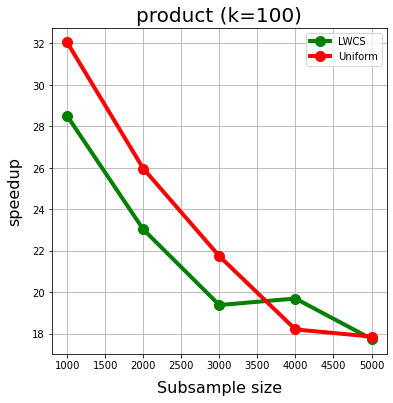

In [16]:
# plotting of speedup for k=100


plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_100_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_100_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('speedup', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('product (k=100)', size=20)

plt.legend(loc='upper right',prop={'size':10})

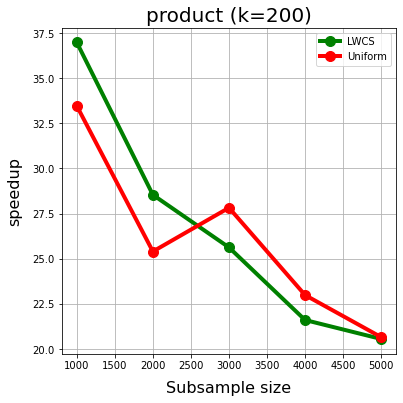

In [17]:
# plotting of speedup for k=200

plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_200_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_200_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('speedup', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('product (k=200)', size=20)

plt.legend(loc='upper right',prop={'size':10})